# default of credit card clients Data Set

In [1]:
import time
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# params
seed = 42

## 1. Подгрузка данных

[Ссылка на скачивание](https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls)

In [3]:
link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls'
df = pd.read_excel(link, skiprows=1).drop('ID', axis=1)

In [4]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## 2. Анализ факторов

### Список факторов

 - X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
 
 - X2: Gender (1 = male; 2 = female).

 - X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

 - X4: Marital status (1 = married; 2 = single; 3 = others).

 - X5: Age (year).

 - X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status (*статус погашения*) in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

 - X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement (*выписка по счету*) in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
 
 - X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

 Таким образом, имеем **кредитную нагрузку** + **соцдем** + **историю предыдущих платежей**. Признаки X(6 + i), X(12 + i), X(18 + i), i = 0, ... 5 относятся **к одному времени** (Сентябрь 2005, ... Апрель 2005). Они по-разному описывают историю предыдущих платежей и предоставляют большой простор для feature engineering'а. Например, можно посмотреть X8 / X12 - сколько человек платил в сентябре 2005 в долях от своего баланса.

In [19]:
X = df.loc[:, df.columns != 'default payment next month']
y = df['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Save data & info ===
# parquet is optimized for large volumes of data
!mkdir samples
X_train.to_parquet('./samples/X_train.parquet')
X_test.to_parquet('./samples/X_test.parquet')
# переводим pd.Series в pd.DataFrame для удобного экспорта
pd.DataFrame(y_train).to_parquet('./samples/y_train.parquet')
pd.DataFrame(y_test).to_parquet('./samples/y_test.parquet')

# сохраняем списки категориальных и колич. переменных
num_vals = [
    'LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
    ]
cat_vals = ['SEX', 'EDUCATION', 'MARRIAGE']

with open('factors.json', 'w') as f:
    json.dump({'cat_vals': cat_vals, "num_vals": num_vals}, f)

�������� ��� 䠩� samples 㦥 �������.


## 3. Статистики и пропуски

### Статистики

In [20]:
print(f'Количество наблюдений: {X.shape[0]}')
print(f'Количество факторов: {X.shape[1]}')
print(f'Количество целевых событий: {y.sum()}')
print(f'Доля целевых событий: {np.round(y.sum() / X.shape[0] * 100, 2)}%')

Количество наблюдений: 30000
Количество факторов: 23
Количество целевых событий: 6636
Доля целевых событий: 22.12%


### Пропуски

Пропуски в датасете отсутствуют:

In [21]:
for col in X.columns:
    print(f'Количество пропусков по фактору {col}:\n\t{X[col].isna().sum()} или {X[col].isna().sum() / df.shape[1] * 100}%')

Количество пропусков по фактору LIMIT_BAL:
	0 или 0.0%
Количество пропусков по фактору SEX:
	0 или 0.0%
Количество пропусков по фактору EDUCATION:
	0 или 0.0%
Количество пропусков по фактору MARRIAGE:
	0 или 0.0%
Количество пропусков по фактору AGE:
	0 или 0.0%
Количество пропусков по фактору PAY_0:
	0 или 0.0%
Количество пропусков по фактору PAY_2:
	0 или 0.0%
Количество пропусков по фактору PAY_3:
	0 или 0.0%
Количество пропусков по фактору PAY_4:
	0 или 0.0%
Количество пропусков по фактору PAY_5:
	0 или 0.0%
Количество пропусков по фактору PAY_6:
	0 или 0.0%
Количество пропусков по фактору BILL_AMT1:
	0 или 0.0%
Количество пропусков по фактору BILL_AMT2:
	0 или 0.0%
Количество пропусков по фактору BILL_AMT3:
	0 или 0.0%
Количество пропусков по фактору BILL_AMT4:
	0 или 0.0%
Количество пропусков по фактору BILL_AMT5:
	0 или 0.0%
Количество пропусков по фактору BILL_AMT6:
	0 или 0.0%
Количество пропусков по фактору PAY_AMT1:
	0 или 0.0%
Количество пропусков по фактору PAY_AMT2:
	0 или

## 4. Визуальный анализ и выбросы

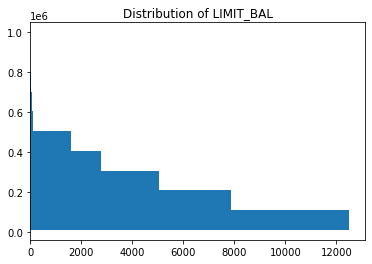

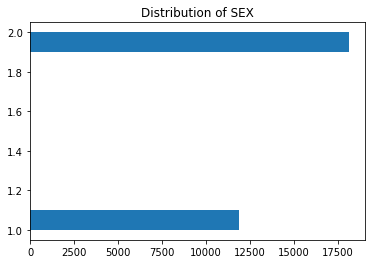

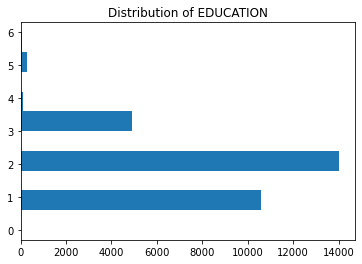

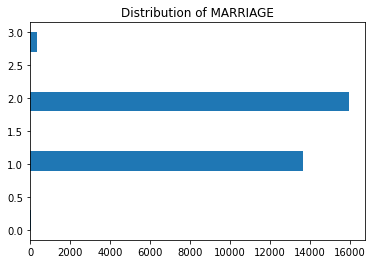

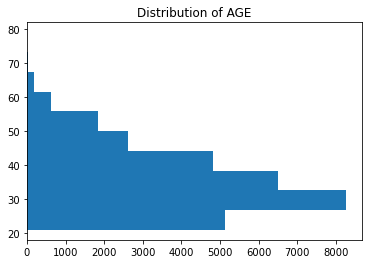

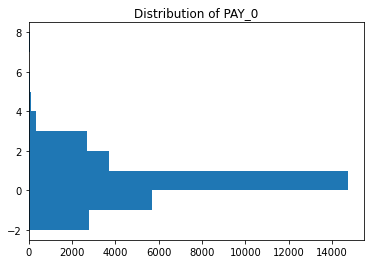

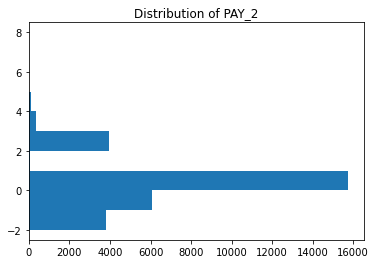

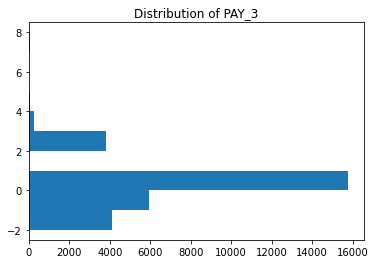

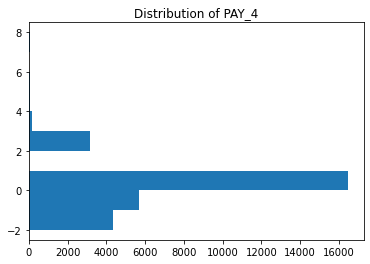

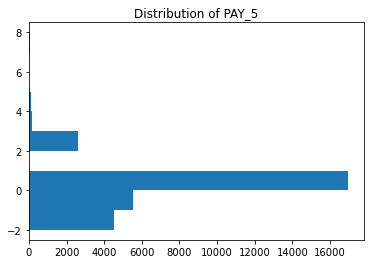

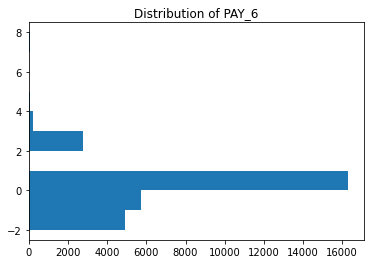

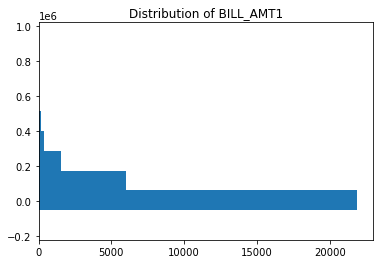

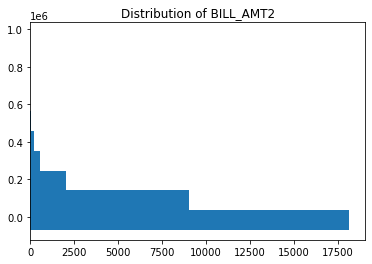

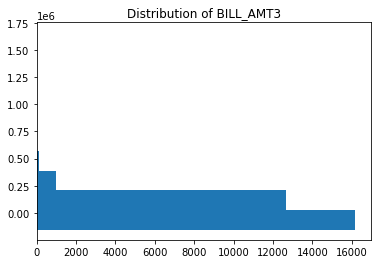

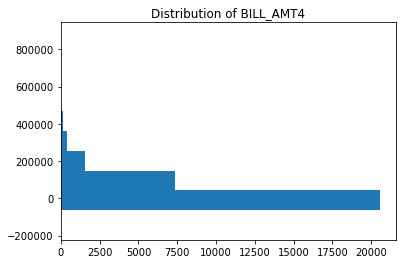

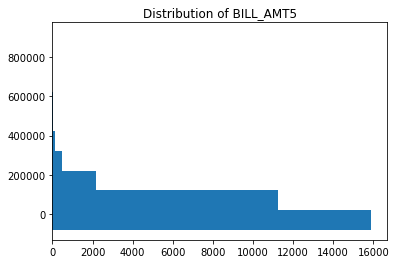

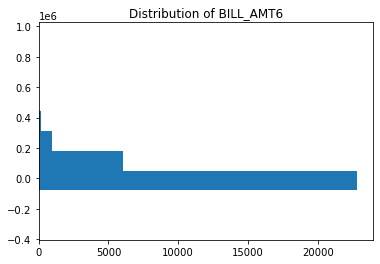

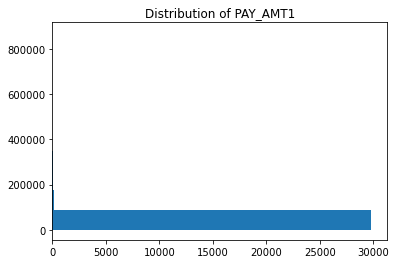

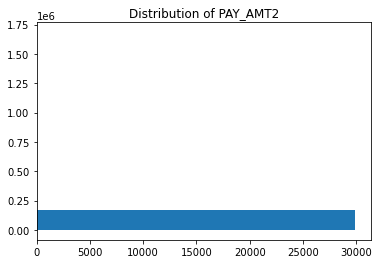

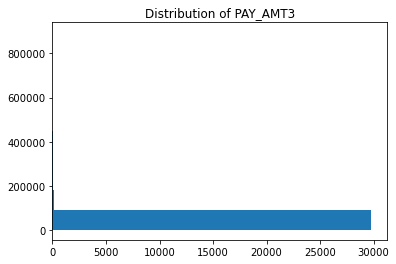

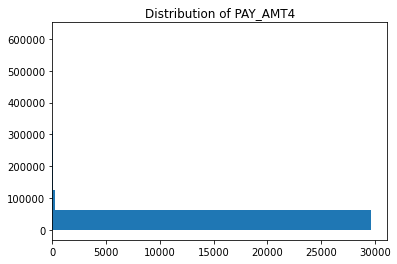

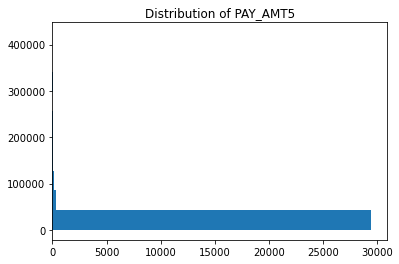

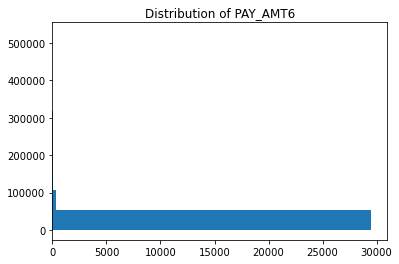

In [22]:
for col in X.columns:
    plt.hist(X[col], orientation='horizontal')
    plt.title(f'Distribution of {col}')
    plt.show()

### Выводы 

Все понятно, без пропусков, можно учить lstm на X6-X23.

# Проверка ликов

In [5]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [61]:
df.groupby(['PAY_3'])['default payment next month'].agg([np.mean, sum, len])

,mean,sum,len
PAY_3,,,
-2,0.185312,757,4085
-1,0.155945,926,5938
0,0.174512,2751,15764
1,0.250000,1,4
2,0.515580,1969,3819
3,0.575000,138,240
4,0.578947,44,76
5,0.571429,12,21
6,0.608696,14,23


In [48]:
df.groupby(['PAY_2'])['PAY_AMT2'].agg([np.median, len])

,median,len
PAY_2,,
-2,190.5,3782
-1,1562.5,6050
0,2772.5,15730
1,537.0,28
2,1646.0,3927
3,0.0,326
4,0.0,99
5,0.0,25
6,0.0,12


In [54]:
(df['PAY_AMT4'] > 0 * 1).groupby(df['PAY_4']).agg([np.mean, len])

,mean,len
PAY_4,,
-2,0.429853,4348
-1,0.761034,5687
0,0.915406,16455
1,1.000000,2
2,0.715416,3159
3,0.305556,180
4,0.202899,69
5,0.000000,35
6,0.200000,5


In [55]:
(df['PAY_AMT3'] > 0 * 1).groupby(df['PAY_3']).agg([np.mean, len])

,mean,len
PAY_3,,
-2,0.457772,4085
-1,0.784271,5938
0,0.930982,15764
1,1.000000,4
2,0.711181,3819
3,0.341667,240
4,0.236842,76
5,0.142857,21
6,0.173913,23


In [56]:
(df['PAY_AMT2'] > 0 * 1).groupby(df['PAY_2']).agg([np.mean, len])

,mean,len
PAY_2,,
-2,0.518244,3782
-1,0.802479,6050
0,0.936427,15730
1,0.571429,28
2,0.727782,3927
3,0.481595,326
4,0.181818,99
5,0.240000,25
6,0.333333,12


Кажется, что ликов как таковых нет. PD 1 month.